In [1]:

# Radiation Predictions

## IREM (Integral Radiation Monitor) 

#U9919, U9920, U9921 (electron, proton and dose) 

#notes:

# JMEX: 

#- Integral AOCS 

#AU5203 & AU5204 : FSS Alpha and Beta Angles 

#A5112 Star tracker background noise (ignore spikes as they are not real background measurements but artifacts from slews) 

#- Solar panels

#The solar array temperature are T0014 -T0020 for both spacecraft.


## Importing the necessary modules

In [2]:
# PANDAS     http://pandas.pydata.org
# easy-to-use data structures and data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for plotting style only
import seaborn as sns
# Random Forest Regressor in Scikit-Learn.org
from sklearn.ensemble import RandomForestRegressor
import os
# Here we export the predefined connectors using the "*test" credentials
from dakit.databases.pymust import int_connector

%matplotlib inline

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get Integral data

## Get Target Radiation Data 

In [3]:
# Integral IREM- U9921
DIR = '/home/jupyter/workspaces/missions/xmmintegral/data/INTEGRAL_context_file/' 

df_target = pd.read_csv(DIR + "target_U9921.csv", index_col=[0])

print(df_target.head())

                     U9921  K5449  L5449  K5119  L5119  G6061  G6062  G6063  \
datetime                                                                      
2015-02-04 15:30:01    7.0      0      6      0      0    0.0    0.0    0.0   
2015-02-04 15:30:09   17.0      1      6      0      0    0.0    0.0    0.0   
2015-02-04 15:30:17   17.0      1      5      0      0    0.0    0.0    0.0   
2015-02-04 15:30:25   12.0      1      3      0      0    0.0    0.0    0.0   
2015-02-04 15:30:33   19.0      1      8      0      0    0.0    0.0    0.0   

                     G2013    G5002  ...      G5017    G5022    G5027  \
datetime                             ...                                
2015-02-04 15:30:01      0  1640.75  ...    1619.75  1587.25  1679.00   
2015-02-04 15:30:09      0  1634.50  ...    1716.75  1612.88  1694.12   
2015-02-04 15:30:17      0  1642.62  ...    1682.00  1606.75  1759.25   
2015-02-04 15:30:25      0  1710.62  ...    1775.12  1584.38  1707.75   
2015-02-

In [4]:
#df_target = df_target[['U9921','K5449','L5449','K5119','L5119']]#,'K5449','L5449','K5119','L5119']]

In [5]:
df_target.head()

,U9921,K5449,L5449,K5119,L5119,G6061,G6062,G6063,G2013,G5002,...,G5017,G5022,G5027,G5032,G5037,E3500,E3544,E3340,E3320,E3360
datetime,,,,,,,,,,,,,,,,,,,,,
2015-02-04 15:30:01,7.0,0,6,0,0,0.0,0.0,0.0,0,1640.75,...,1619.75,1587.25,1679.00,1740.12,1649.62,0,0,215,1064,1064
2015-02-04 15:30:09,17.0,1,6,0,0,0.0,0.0,0.0,0,1634.50,...,1716.75,1612.88,1694.12,1864.00,1746.62,0,0,211,1096,1096
2015-02-04 15:30:17,17.0,1,5,0,0,0.0,0.0,0.0,0,1642.62,...,1682.00,1606.75,1759.25,1724.25,1690.75,0,0,242,1087,1087
2015-02-04 15:30:25,12.0,1,3,0,0,0.0,0.0,0.0,0,1710.62,...,1775.12,1584.38,1707.75,1752.88,1697.00,0,0,212,1081,1081
2015-02-04 15:30:33,19.0,1,8,0,0,0.0,0.0,0.0,0,1647.75,...,1684.50,1584.38,1695.62,1769.62,1678.50,0,0,233,1092,1092


### Transforming the time format for convenience

In [6]:
#---------- Transform ms unix time into readable still machine-intepretable format corresponding to pandas 
df_target.index = pd.to_datetime(df_target.index)

## Opening Prepared Context Data File for Integral

In [7]:
#df_context_final = pd.read_csv('data/INTEGRAL_context_file/FinalContextFile.csv', index_col=[0])

df_context_final = pd.read_csv('data/INTEGRAL_context_file/FinalContextFile.csv', index_col=[0])
df_context_final.index = pd.to_datetime(df_context_final.index)

In [8]:
df_context_final.tail()

,AU5201,HP,HA,LONG,SMA,ECCENT,INCL,NODE,ARGPER,PERIOD,DELTA,rx,ry,rz,vx,vy,vz,altitude
datetime,,,,,,,,,,,,,,,,,,
2017-11-20 09:22:51,0.155845,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,63:50:15,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:22:59,0.155845,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,63:50:15,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:23:07,0.136364,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,63:50:15,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:23:15,0.155845,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,63:50:15,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:23:23,0.155845,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,63:50:15,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937


In [9]:
#df_context_final['cnt'] = df_context_final['cnt']**2.5

In [10]:
print(df_context_final.shape)

(9475159, 18)


In [11]:
#df_context_final['penumbra'].head()

In [12]:
#choose only the columns of interest
df_context_final = df_context_final[['HP', 'HA', 'LONG', 'SMA', 'ECCENT', 'INCL', 'NODE',
       'ARGPER', 'DELTA','rx','ry','rz','vx','vy','vz']]
df_context_final.tail()

,HP,HA,LONG,SMA,ECCENT,INCL,NODE,ARGPER,DELTA,rx,ry,rz,vx,vy,vz
datetime,,,,,,,,,,,,,,,
2017-11-20 09:22:51,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692
2017-11-20 09:22:59,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692
2017-11-20 09:23:07,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692
2017-11-20 09:23:15,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692
2017-11-20 09:23:23,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692


In [13]:
#df_context_final['umbra'].head()

In [14]:
#type(df_context_final['umbra'])

In [15]:
#df_context_final['penumbra'].head()

In [16]:
#type(df_context_final['penumbra'])

# Last data preparation

In [17]:
resampled_context = df_context_final.copy()
resampled_context = resampled_context.resample('15min').pad()[1:]
resampled_context.head()

,HP,HA,LONG,SMA,ECCENT,INCL,NODE,ARGPER,DELTA,rx,ry,rz,vx,vy,vz
datetime,,,,,,,,,,,,,,,
2015-02-04 15:45:00,8665.1,140883.2,171.7,81154.72,0.814409,54.225,226.65,258.43,-6601.158,2758.317639,12849.531542,-9457.683381,4.230777,5.105960,-0.594665
2015-02-04 16:00:00,8665.1,140883.2,171.7,81154.72,0.814409,54.225,226.65,258.43,-6601.158,7445.441131,14992.136290,-6768.722929,3.355299,5.084892,-1.458109
2015-02-04 16:15:00,8665.1,140883.2,171.7,81154.72,0.814409,54.225,226.65,258.43,-6601.158,11737.857749,16316.074728,-3698.176407,2.585889,4.838418,-1.999774
2015-02-04 16:30:00,8665.1,140883.2,171.7,81154.72,0.814409,54.225,226.65,258.43,-6601.158,15591.955471,17019.689832,-479.010916,1.972360,4.515249,-2.311063
2015-02-04 16:45:00,8665.1,140883.2,171.7,81154.72,0.814409,54.225,226.65,258.43,-6601.158,19038.370847,17272.783893,2757.926329,1.497399,4.187870,-2.478500


In [18]:
print(resampled_context.shape)

(97895, 15)


In [19]:
resampled_context['pseudo_altitude'] = np.sqrt(resampled_context['rx']**2 + resampled_context['ry']**2 + resampled_context['rz']**2) 
print(resampled_context.shape)
#resampled_context['pseudo_altitude'].plot(figsize=(18,12), color='deeppink', alpha=0.8)

(97895, 16)


In [20]:
resampled_context.tail()

,HP,HA,LONG,SMA,ECCENT,INCL,NODE,ARGPER,DELTA,rx,ry,rz,vx,vy,vz,pseudo_altitude
datetime,,,,,,,,,,,,,,,,
2017-11-20 08:15:00,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 08:30:00,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 08:45:00,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:00:00,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937
2017-11-20 09:15:00,6812.9,142687.5,41.6,81109.66,0.837679,49.211,180.55,264.06,4.04,-24296.825961,1230.263882,-1857.611965,2.967036,-2.814599,3.321692,24398.770937


In [21]:
resampled_target = df_target.resample('15min').pad()[1:]

resampled_target.head()

,U9921,K5449,L5449,K5119,L5119,G6061,G6062,G6063,G2013,G5002,...,G5017,G5022,G5027,G5032,G5037,E3500,E3544,E3340,E3320,E3360
datetime,,,,,,,,,,,,,,,,,,,,,
2015-02-04 15:45:00,15.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1651.12,...,1649.50,1620.62,1738.00,1767.12,1741.00,0.0,0.0,212.0,1062.0,1062.0
2015-02-04 16:00:00,64661.451941,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4032.50,...,3544.25,3572.50,3350.88,3154.12,3723.88,0.0,0.0,217.0,8371.0,8371.0
2015-02-04 16:15:00,64717.534196,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3381.88,...,2816.38,2917.75,2644.12,2426.75,3006.25,0.0,0.0,213.0,15749.0,15749.0
2015-02-04 16:30:00,64773.120148,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3394.88,...,2841.62,2919.75,2639.88,2405.38,3030.38,0.0,0.0,207.0,15310.0,15310.0
2015-02-04 16:45:00,64828.706100,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3205.62,...,2628.12,2700.62,2418.38,2190.50,2821.75,0.0,0.0,196.0,18405.0,18405.0


In [22]:
resampled_context.shape

(97895, 16)

# Machine Learning

In [63]:
# Change the training and prediction dates to fit the new data
#training_idx = (resampled_context.index >= '2015-09-15 07:46:00') & (resampled_context.index <= '2017-07-20 10:40:00')
training_idx2 = (resampled_context.index >= '2016-09-15 07:46:00') & (resampled_context.index <= '2016-10-25 10:40:00')
#predict_idx  = (resampled_context.index >= '2017-07-31 00:00:00') & (resampled_context.index <= '2017-08-31 23:59:00')

training_idx = (resampled_context.index >= '2015-02-04 15:30:00') & (resampled_context.index <= '2017-11-15 10:40:00')
#predict_idx  = (resampled_context.index >= '2016-11-16 00:00:00') & (resampled_context.index <= '2017-11-16 23:59:00')
predict_idx  = (resampled_context.index >= '2017-10-16 00:00:00') & (resampled_context.index <= '2017-11-16 23:59:00')

## Training

In [64]:
#rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=30)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=5)

print(resampled_context.shape)
print(resampled_target.shape)

(97895, 16)
(97895, 23)


In [65]:
rf.fit(resampled_context[training_idx], resampled_target[training_idx])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Predicting

In [66]:
prediction = rf.predict(resampled_context[predict_idx])

In [67]:
prediction.shape

(3072, 23)

In [68]:
resampled_target[predict_idx].values[:,0].max()

58358.0

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


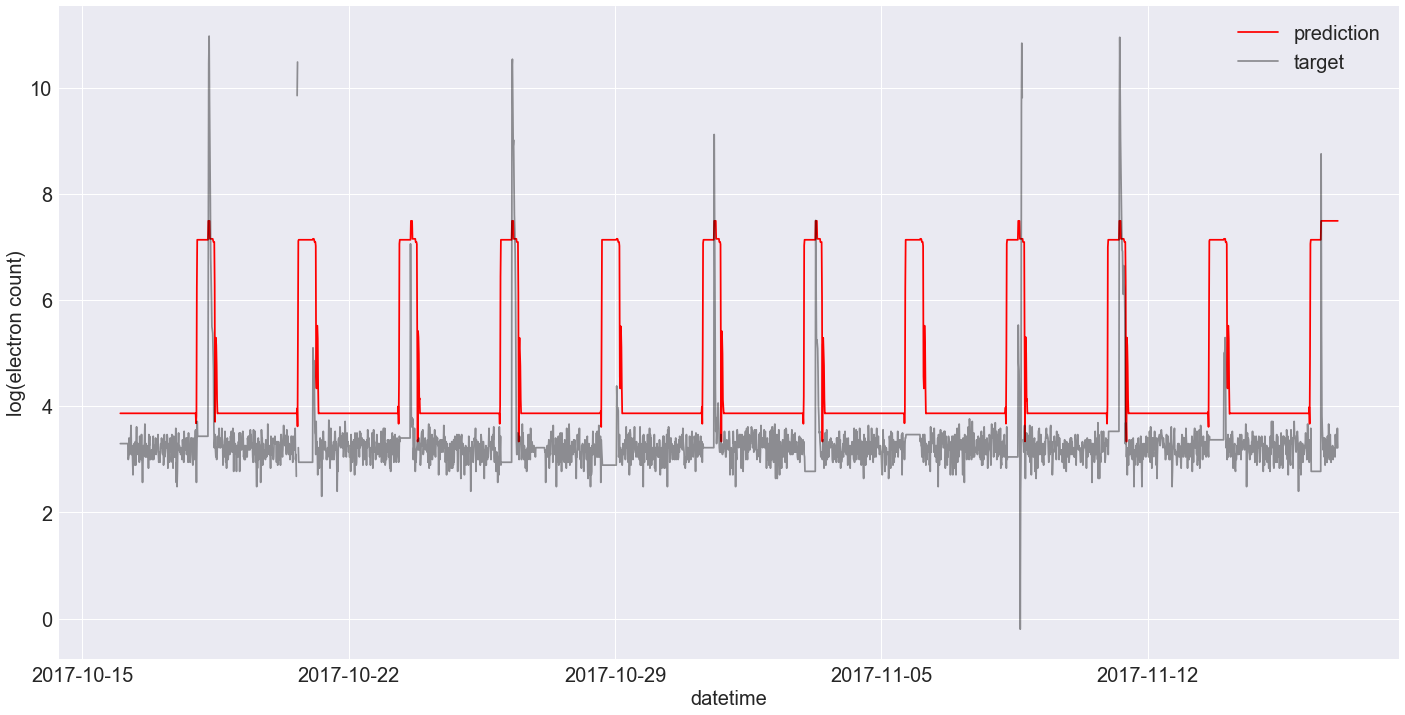

In [69]:
F = plt.figure(figsize = (24,12)) 
n=1000
n0=0
plt.plot(resampled_context[predict_idx].index, np.log(prediction[:,0]), label='prediction', alpha = 1.0, color='red', figure=F)
plt.plot(resampled_context[predict_idx].index,np.log(resampled_target[predict_idx].values[:,0]), label='target',alpha = 0.4, color='k', figure=F)

#plt.plot(resampled_context[predict_idx].index, prediction[:,0], label='prediction', alpha = 1.0, color='red', figure=F)
#plt.plot(resampled_context[predict_idx].index,resampled_target[predict_idx].values[:,0], label='target',alpha = 0.4, color='k', figure=F)

#plt.plot(resampled_context[predict_idx].index,resampled_context[predict_idx]['pseudo_altitude']/5, label='altitude',alpha = 0.9, color='m', linewidth=2, figure=F)
#plt.plot(resampled_context[n0:n].index, prediction[:,0][n0:n], label='prediction', alpha = 0.8, color='m', linewidth =3, figure=F)
#plt.plot(resampled_context[n0:n].index,resampled_target[predict_idx].values[:,0][n0:n], label='target U9921',alpha = 0.7, color='green', figure=F)
plt.xlabel('datetime', fontsize=20)
plt.ylabel('log(electron count)', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size': 20}, loc=1)


In [ ]:
#F = plt.figure(figsize = (16,12)) 
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['pseudo_altitude'], label='altitude',alpha = 0.6, color='r', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['cnt'], label='sunspots',alpha = 0.8, color='m', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2].values[:,0], label='target U9921',alpha = 0.6, color='blue', linewidth=2, figure=F)
#plt.legend()

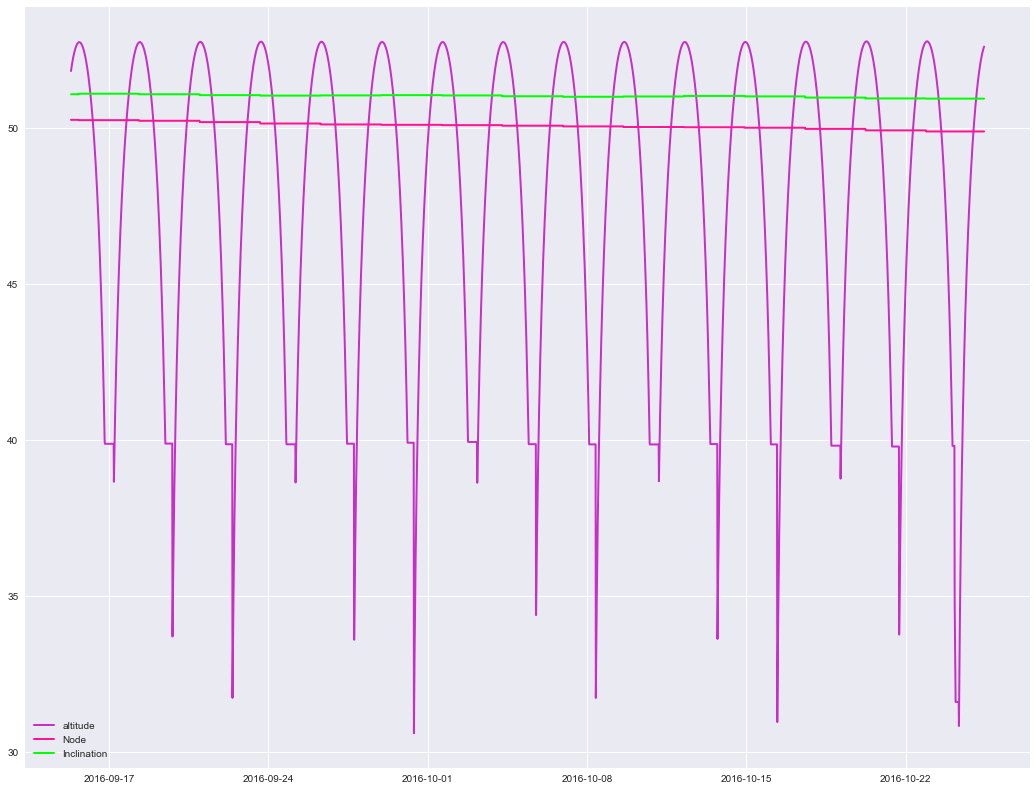

In [31]:
F = plt.figure(figsize = (18,14)) 
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['pseudo_altitude']**(1/3), label='altitude',alpha = 0.8, color='m', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['rx'], label='rx',alpha = 0.8, color='m', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['NODE']/4.0, label='Node',alpha = 1.0, color='deeppink', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['INCL'], label='Inclination',alpha = 1.0, color='lime', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2].values[:,0], label='target U9921',alpha = 0.4, color='blue', linewidth=2, figure=F)
plt.legend()

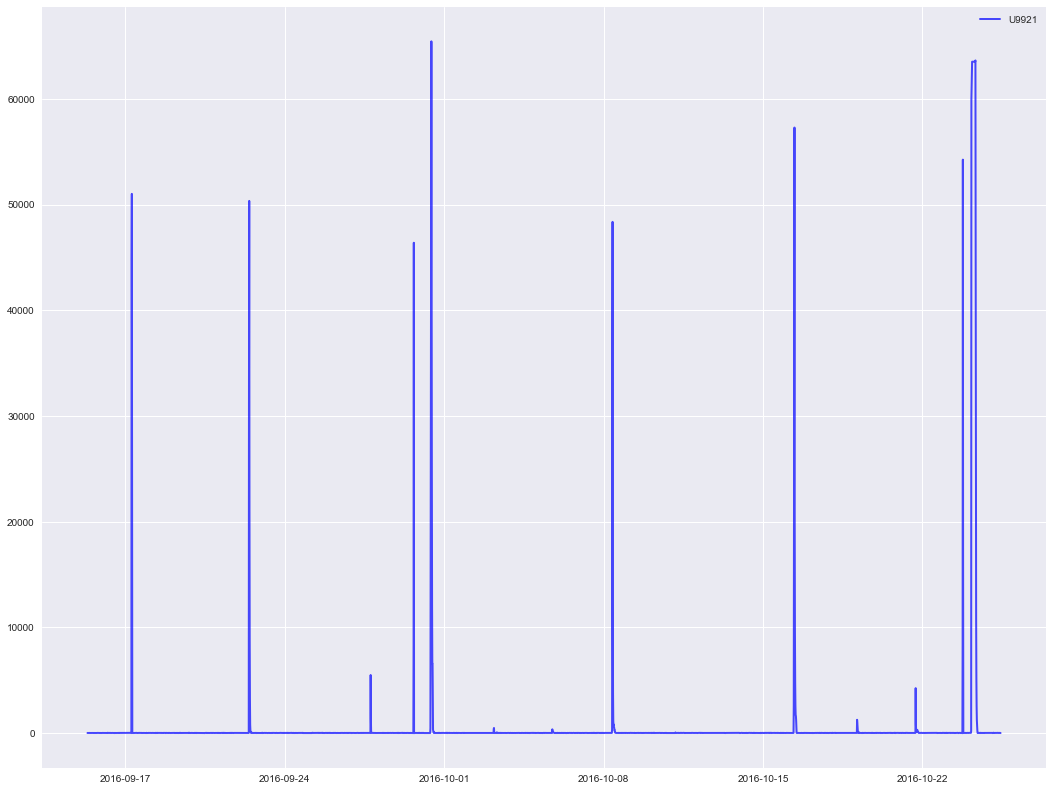

In [32]:
F = plt.figure(figsize = (18,14)) 
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['pseudo_altitude'], label='altitude',alpha = 0.8, color='r', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2]['U9921'], label='U9921',alpha = 0.7, color='b', linewidth=2, figure=F)
plt.legend()

In [33]:
#F = plt.figure(figsize = (22,18)) 
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['pseudo_altitude']/50000, label='altitude',alpha = 0.8, color='r', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['vx'], label='vx',alpha = 0.8, color='m', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['vy'], label='vy',alpha = 0.8, color='g', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['vz'], label='vz',alpha = 0.8, color='b', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2].values[:,0], label='target U9921',alpha = 0.4, color='blue', linewidth=2, figure=F)
#plt.legend()

In [34]:
#F = plt.figure(figsize = (18,14)) 
#plt.plot(resampled_context[training_idx].index,resampled_context[training_idx]['umbra'], label='umbra',alpha = 0.8, color='red', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx].index,resampled_context[training_idx]['penumbra'], label='penumbra',alpha = 0.4, color='black', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2].values[:,0], label='target U9921',alpha = 0.4, color='blue', linewidth=2, figure=F)
#plt.legend()

In [35]:
print(prediction.shape)
print(resampled_target[predict_idx].shape)
print(resampled_target[predict_idx].head())

(35136, 23)
(35136, 23)
                     U9921    K5449    L5449    K5119    L5119  G6061  \
datetime                                                                
2016-11-16 00:00:00   17.0  22603.0  22532.0  15048.0  14840.0  560.0   
2016-11-16 00:15:00   27.0  22546.0  22873.0  15029.0  14940.0  564.0   
2016-11-16 00:30:00   22.0  22294.0  22751.0  14915.0  14920.0  560.0   
2016-11-16 00:45:00   23.0  22899.0  22890.0  15154.0  14889.0  572.0   
2016-11-16 01:00:00   23.0  22633.0  22609.0  14921.0  14842.0  544.0   

                       G6062    G6063   G2013    G5002  ...      G5017  \
datetime                                                ...              
2016-11-16 00:00:00  40168.0  40160.0  1131.0  540.125  ...    564.000   
2016-11-16 00:15:00  40256.0  40232.0  1170.0  525.500  ...    607.375   
2016-11-16 00:30:00  40216.0  40200.0  1150.0  567.875  ...    540.500   
2016-11-16 00:45:00  40408.0  40400.0  1115.0  508.125  ...    559.500   
2016-11-16 01:00:00 

In [36]:
#plt.plot(prediction, color='r', alpha=0.7)

In [37]:
print(resampled_target[predict_idx].shape)
print(prediction.shape)

(35136, 23)
(35136, 23)


In [38]:
df_prediction = pd.Series(prediction[:,0], index = resampled_context[predict_idx].index)
#df_prediction = pd.Series(prediction, index = resampled_context[predict_idx].index)
type(df_prediction)

pandas.core.series.Series

pandas.core.frame.DataFrame

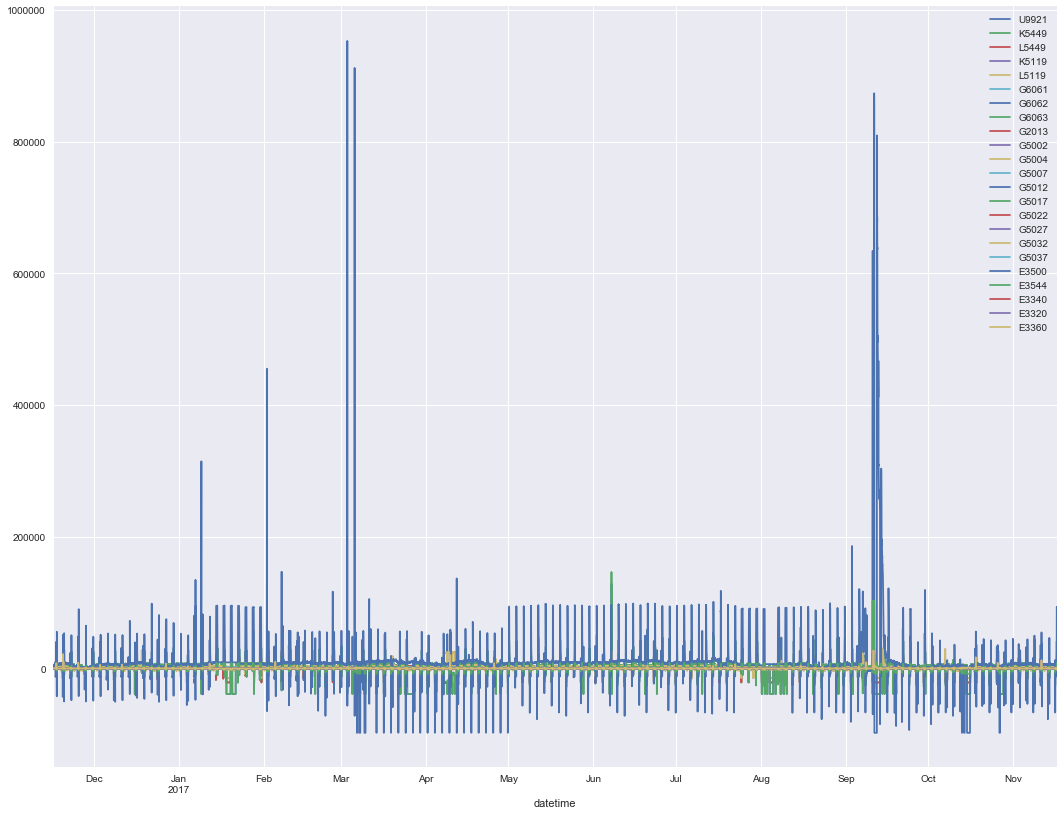

In [39]:
error = resampled_target[predict_idx]-prediction
error.plot(figsize=(18,14))
type(error)

In [40]:
error_small = error['U9921'].copy()  
error_large = error['U9921'].copy() 

In [41]:
fail = error_small[(error_small > 800)].index 
work = error_large[(error_large <= 800)].index

In [42]:
error_small[fail] = 0
error_large[work] = 0

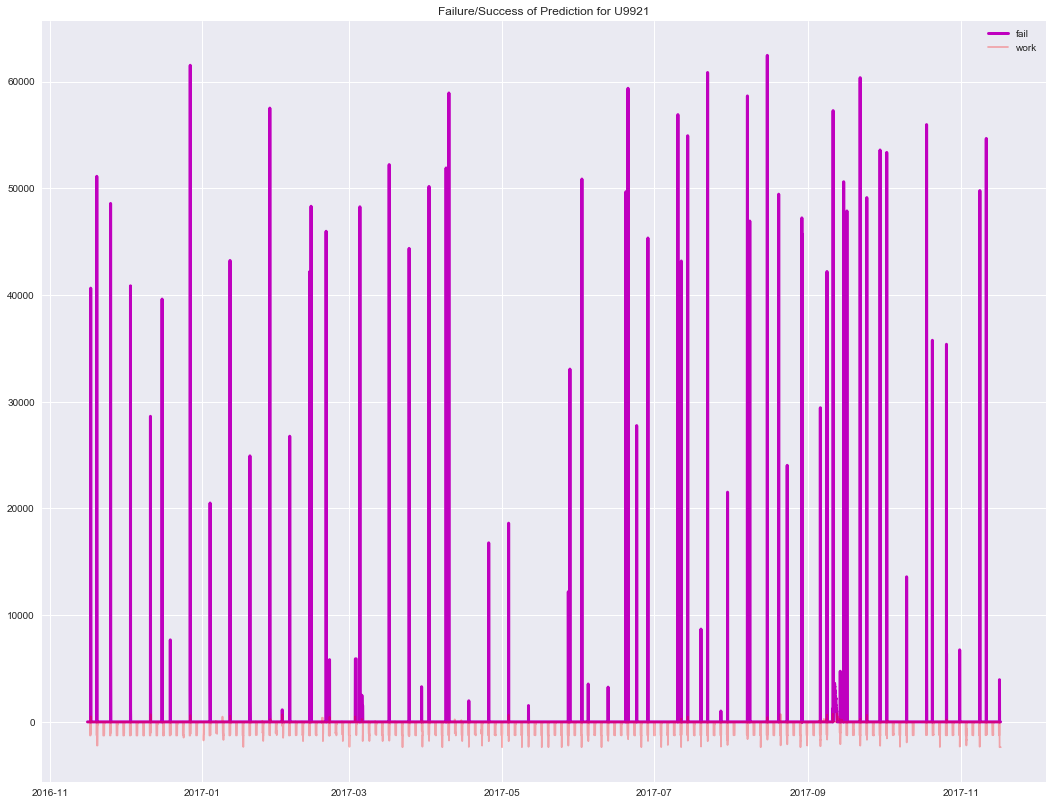

In [43]:
F = plt.figure(figsize = (18,14)) 
plt.plot(error_large, label='fail',alpha = 1.0, color='m', linewidth =3, figure=F)
plt.plot(error_small, label='work',alpha = 0.3, color='r', figure=F)
plt.title('Failure/Success of Prediction for U9921')
plt.legend()

In [44]:
# Calculate time difference if error is larger than a threshold

#print(error_large[error_large > 800].index)
#resampled_target[resampled_target.values[:,0] > 800]
resampled_target[predict_idx][resampled_target[predict_idx].values[:,0] > 800]

,U9921,K5449,L5449,K5119,L5119,G6061,G6062,G6063,G2013,G5002,...,G5017,G5022,G5027,G5032,G5037,E3500,E3544,E3340,E3320,E3360
datetime,,,,,,,,,,,,,,,,,,,,,
2016-11-17 06:45:00,7523.461538,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3638.120,...,3473.62,3373.00,3363.50,3586.120,3264.00,0.0,0.0,278.0,10023.0,10023.0
2016-11-17 07:00:00,42465.000000,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3896.380,...,3736.75,3636.88,3639.25,3882.620,3554.62,0.0,0.0,272.0,6023.0,6023.0
2016-11-17 07:15:00,15355.000000,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3873.120,...,3739.25,3602.38,3665.00,3886.000,3544.00,0.0,0.0,288.0,3726.0,3726.0
2016-11-17 07:30:00,5314.000000,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3606.500,...,3463.62,3333.75,3406.25,3660.880,3308.50,0.0,0.0,269.0,2734.0,2734.0
2016-11-17 07:45:00,1818.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3257.120,...,3134.88,2993.00,3085.50,3367.620,2964.12,0.0,0.0,279.0,2147.0,2147.0
2016-11-19 17:00:00,3087.000000,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3031.120,...,3070.62,3029.75,3069.00,3090.880,3096.62,0.0,0.0,302.0,1877.0,1877.0
2016-11-19 17:15:00,38129.000000,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3677.500,...,3669.88,3477.00,3625.88,3789.120,3994.12,0.0,0.0,291.0,4520.0,4520.0
2016-11-19 17:30:00,52986.705628,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2884.880,...,2852.75,2683.38,2788.75,2977.250,3211.38,0.0,0.0,292.0,14597.0,14597.0
2016-11-19 17:45:00,37213.857143,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2378.000,...,2307.25,2128.38,2288.25,2476.620,2701.25,0.0,0.0,278.0,22182.0,22182.0


In [45]:
#prediction[:,0][(prediction[:,0] > 100) or (prediction[:,0].any() < 0)]
prediction[:,0]#[(prediction[:,0] < 0)]

array([   47.79920034,    47.79920034,    47.79920034, ...,  2391.85308455,
        2391.85308455,  2391.85308455])

In [46]:
error_large[error_large > 800]

datetime
2016-11-17 06:45:00     5131.608454
2016-11-17 07:00:00    40640.556365
2016-11-17 07:15:00    13530.556365
2016-11-17 07:30:00     4015.824533
2016-11-19 17:00:00     1788.824533
2016-11-19 17:15:00    36830.824533
2016-11-19 17:30:00    51121.120712
2016-11-19 17:45:00    35348.272227
2016-11-19 18:00:00    18908.326569
2016-11-19 18:15:00     3135.478084
2016-11-25 06:15:00    48577.146915
2016-11-25 06:30:00    21669.556365
2016-11-25 06:45:00    14004.556365
2016-11-25 07:00:00     6695.824533
2016-11-25 07:15:00     2862.824533
2016-11-25 07:30:00     1078.824533
2016-12-03 05:45:00    40858.480249
2016-12-03 06:00:00    22090.556365
2016-12-03 06:15:00     5509.556365
2016-12-03 06:30:00     1230.824533
2016-12-11 05:45:00    28632.556365
2016-12-11 06:00:00    15693.824533
2016-12-11 06:15:00     9055.824533
2016-12-11 06:30:00     5055.824533
2016-12-11 06:45:00     2060.824533
2016-12-11 07:00:00     1285.824533
2016-12-15 21:15:00    38515.200800
2016-12-15 21:30:00

In [47]:
(error_small[error_small < -100])

datetime
2016-11-16 23:15:00    -158.509077
2016-11-16 23:30:00   -1219.913602
2016-11-16 23:45:00   -1272.175467
2016-11-17 00:00:00   -1272.175467
2016-11-17 00:15:00   -1272.175467
2016-11-17 00:30:00   -1272.175467
2016-11-17 00:45:00   -1272.175467
2016-11-17 01:00:00   -1272.175467
2016-11-17 01:15:00   -1272.175467
2016-11-17 01:30:00   -1272.175467
2016-11-17 01:45:00   -1272.175467
2016-11-17 02:00:00   -1272.175467
2016-11-17 02:15:00   -1272.175467
2016-11-17 02:30:00   -1272.175467
2016-11-17 02:45:00   -1272.175467
2016-11-17 03:00:00   -1272.175467
2016-11-17 03:15:00   -1272.175467
2016-11-17 03:30:00   -1272.175467
2016-11-17 03:45:00   -1272.175467
2016-11-17 04:00:00   -1272.175467
2016-11-17 04:15:00   -1272.175467
2016-11-17 04:30:00   -1272.175467
2016-11-17 04:45:00   -1272.175467
2016-11-17 05:00:00   -1272.175467
2016-11-17 05:15:00   -1272.175467
2016-11-17 05:30:00   -1272.175467
2016-11-17 05:45:00   -1272.175467
2016-11-17 06:00:00   -1272.175467
2016-11-17 

In [48]:
mse = (error**2).mean()
np.sqrt(mse)

U9921     2310.190653
K5449     5043.646672
L5449     5159.618772
K5119     3417.821674
L5119     3451.446858
G6061      181.484441
G6062    10206.087894
G6063    10223.011208
G2013      302.547238
G5002      466.242258
G5004     3977.894129
G5007      477.093368
G5012      474.159405
G5017      469.306031
G5022      457.077741
G5027      478.272027
G5032      483.557733
G5037      474.453091
E3500    37498.213124
E3544     2237.836874
E3340       34.945164
E3320      915.486876
E3360      969.017357
dtype: float64

In [49]:
print("Contribution of features as returned by the Random Forest Regressor:")
for feature, importance in sorted(zip(rf.feature_importances_, resampled_context[predict_idx].columns), key=lambda x: x[0], reverse=True):
    print(str(feature)+", "+str(importance))

Contribution of features as returned by the Random Forest Regressor:
0.721219555477, pseudo_altitude
0.124822730892, NODE
0.0360342879046, rz
0.0249437599106, rx
0.0209365276847, INCL
0.0207959006372, HP
0.0160967442593, vz
0.00810226989338, ARGPER
0.00603327398953, ry
0.00507230129363, vy
0.00439237893234, vx
0.00396073777629, LONG
0.0037053962174, DELTA
0.00244447788632, ECCENT
0.000902899222932, HA
0.000536758022535, SMA
